### p.129
- 데이터를 정규화 할 때 train 에서만 fit, test는 fit X -> 왜? -> 
- train에는 a,b,c가 모두 있을 때 train에는 b 만 있을 수 있다. min, max가 서로 다를 수 있어 min max 스케일링 시 기준치가 달라질 수 있어 데이터 변환 값이 달라질 수 있다. 같은 변환으로 유지 시켜 줄려면 train에서만 fit 해주어야 한다. 
- train, test 나누기 전에 데이터를 전체 스케일링 해주어도 된다.
- 단, 스케일링을 진행 했으면, 새로운 데이터를 추가 할 때도 동일한 작업을 해 주어야 한다.
- 모델을 만든 사람 밖에 전처리 과정을 알 수 없다. -> 피클로 전처리 과정 저장 해 주어야 한다.
- 인공지능도 동일한 프로세스를 따른다.
- 처음부터 데이터가 train, test로 나뉘어 들어오면 train에만 fit,


### 타이타닉 생존자 예측하기
- 데이터 분석에 중점을 두는 실습 p.130

- 생존 여부 0,1은 선실 등급에 영향을 받는다 검증 위하여
- 귀무 가설 : 선실 등급과 성별에 영향을 받지 않는다,
- 100명이 있으면 0.05%는 이슈가 있다.는 구간을 알아내는 것이 p-value 
- 먼저 분석 할 가치가 있는 데이터인지 판단 <- 데이터의 정규

- 완만하게 평균 근처에 데이터들이 밀집되어 있는 자료가 분석하기 좋다. (정규분포)
- 양측 검증, 단측 검증. 양쪽 끝에 몇퍼센트 차지하는지 -p value



- 생존자와 사망자의 전체 인원 비율 확인
- 선실 등급/ 사망자 수 상관관계
- 성별에 따른, 나이에 따른, … 상관관계 확인 -> EDA로 x 변수 찾아내기

- 도메인에 대한 이해 _ 가족이 생존에 더 유리, 1등실은 배 위에 위치, 구명 보트 근접, 시대 상황 반영. 3등실에 갓난 아이비율이 높았음. 16살 노동인구. 노동 인구 이주가 많은 시기로 3등실에 많은 비율 차지함. 부부끼리 일하기 위해서, 1등실 나이대 높음.
- 선실등급이 생존여부에 영향을 주는 것이 확실함에도 생존에 불리한 연령대가 많이 분포함.
- 젊은 남자를 기준으로 생존여부를 분석해야 한다.
- 나이, 성별을 제외한 보편적인 데이터 셋을 보앗을 때 선실등급이 영향을 주는가를 보아야 한다.
- 나이에대한 결측치가 많다. 
- 다른 데이터 보다 접근하기 쉽다.
- 1등실이면서 나이가 많으면 무조건 우선순위임에도 사망자가 많다. 시대상황을 이해해야 한다. 그 당시 나이 많은 사람들이 스스로 구조보트에 타지 않기를 선택함.

- EDA로 상관관계를 분석하고 보고서를 쓰는 것이 기본 분석


- p.130 - 139 EDA
- y 생존여부
- x ?
- https://github.com/wikibook/pymlrev2
- 2.6 사이킷런으로 수행하는 타이타닉 생존자 예측 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

- 실습 데이터 다운로드 페이지
https://www.kaggle.com/c/titanic/data

    - test, train 파일 다운로드

In [5]:
# pip install fsspec

     ---------------------------------------- 0.0/160.1 kB ? eta -:--:--
     ---------------------------------------- 160.1/160.1 kB ? eta 0:00:00


In [7]:
baseFolder = 'c://data'
titanic_df = pd.read_csv(baseFolder + './titanic/train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [8]:
# 랜덤하게 데이터 확인
numList = [3,5,7]
titanic_df.iloc[numList, :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [10]:
datalen = len(titanic_df)
datalen # data MAX 값

891

In [11]:
# 랜덤으로 데이터를 한 개 만드는게 타이타닉 데이터 갯수에 한해서 나오도록
import random

num = 5
numList = []
for x in range(num):
    numList.append(random.randrange(0, datalen))
titanic_df.iloc[numList,:]



# code 단축 시키기 
# list comprehension

# numList = [random.randrange(0, datalen) for x in range(num)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
612,613,1,3,"Murphy, Miss. Margaret Jane",female,NaN,1,0,367230,15.500,NaN,Q
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.000,NaN,S
565,566,0,3,"Davies, Mr. Alfred J",male,24.0,2,0,A/4 48871,24.150,NaN,S
425,426,0,3,"Wiseman, Mr. Phillippe",male,NaN,0,0,A/4. 34244,7.250,NaN,S
436,437,0,3,"Ford, Miss. Doolina Margaret ""Daisy""",female,21.0,2,2,W./C. 6608,34.375,NaN,S


In [12]:
# 함수로 만들기
def myRandom(data, num = 5):
    import random

    dataLen = len(data)
    numList = [random.randrange(0, dataLen) for x in range(num)]
    
    # return data.iloc[numList, :]
    display(data.iloc[numList, :])
myRandom(titanic_df)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
70,71,0,2,"Jenkin, Mr. Stephen Curnow",male,32.0,0,0,C.A. 33111,10.500,NaN,S
719,720,0,3,"Johnson, Mr. Malkolm Joackim",male,33.0,0,0,347062,7.775,NaN,S
331,332,0,1,"Partner, Mr. Austen",male,45.5,0,0,113043,28.500,C124,S
773,774,0,3,"Elias, Mr. Dibo",male,NaN,0,0,2674,7.225,NaN,C
368,369,1,3,"Jermyn, Miss. Annie",female,NaN,0,0,14313,7.750,NaN,Q


In [13]:
# 같이 넘어가는 부분 처리 
# 함수로 만들기
def myRandom(data, num = 5):
    import random

    dataLen = len(data)
    
    if num>dataLen:
        print('data overflow', 'max Count => ' ,dataLen)
    else:
        numList = [random.randrange(0, dataLen) for x in range(num)]

        display(data.iloc[numList, :])
myRandom(titanic_df, 2000)


data overflow max Count =>  891


 - ‘복원 추출, 비복원 추출’
- 중복 없이 뽑기 
- 	뽑은 데이터 삭제 후 뽑기
- 	이미 뽑은 데이터면 다시 뽑기
- 추출 개수 -> 문자나 음수와 같이 조건에 맞지 않는 것 처리


In [ ]:
if num>datalen | num < 1:

# 예외 처리
- 문자입력은 사용자 문제
- 소수점, 리스트 -> ???
- 경우의 수들이 너무 많음 -> 정수만 받아 들이


In [14]:
# 같이 넘어가는 부분 처리 
# 함수로 만들기
def myRandom(data, num = 5):
    if type(num) != int:
        print('정수가 아니다')
        return
    import random

    dataLen = len(data)
    
    if num>dataLen:
        print('data overflow', 'max Count => ' ,dataLen)
    else:
        numList = [random.randrange(0, dataLen) for x in range(num)]

        display(data.iloc[numList, :])
myRandom(titanic_df, 'dfd')


정수가 아니다


In [15]:
# 같이 넘어가는 부분 처리 
# 함수로 만들기
def myRandom(data, num = 5):
    try:
        import random

        dataLen = len(data)
        
        if num>dataLen:
            print('data overflow', 'max Count => ' ,dataLen)
        else:
            numList = [random.randrange(0, dataLen) for x in range(num)]

            display(data.iloc[numList, :])
    except:
        print('정수 넣어라')
myRandom(titanic_df, 'dfd')


정수 넣어라


In [16]:
titanic_df.info()
# dtype 중요 이슈
# object는 계산 불가능. 상관도 계산 할 때 문제 발생(숫자만 가능)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 상관 계수 작성
- 피어슨 상관계수 
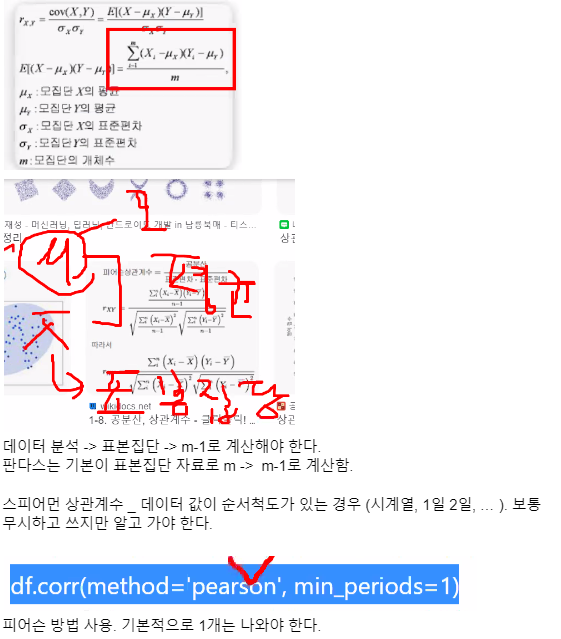


In [17]:
# [추가]
# 판다스 Survived(생사여부), pclass(선실등급)이 영향이 있는가 => 데이터 상관 계수 제작 
# titanic_df.corr()   # 타입 문제 발생

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

In [19]:
tmp = titanic_df[['Survived', 'Pclass']]
tmp
tmp.corr()

,Survived,Pclass
Survived,1.000000,-0.338481
Pclass,-0.338481,1.000000


In [ ]:
# 필요한 데이터 셋으로 구성하기 
tmp = titanic_df.iloc[:, [2,1,5,6,7,9]]

- 인덱싱 하기에 iloc도 굉장히 많이 사용한다.

- 판다스 dtype 확인 -> 원하는 타입의 필드만 꺼내기
- ‘판다스 필드 중에 숫자 필드만 추출’
- 숫자 데이터만 보고 싶은 경우


In [21]:
corrList = []
tmp = titanic_df.dtypes
for index, val in zip(tmp.index, tmp.values):
    if val == 'int64':
        corrList.append(index)
titanic_df[corrList].corr()

,PassengerId,Survived,Pclass,SibSp,Parch
PassengerId,1.000000,-0.005007,-0.035144,-0.057527,-0.001652
Survived,-0.005007,1.000000,-0.338481,-0.035322,0.081629
Pclass,-0.035144,-0.338481,1.000000,0.083081,0.018443
SibSp,-0.057527,-0.035322,0.083081,1.000000,0.414838
Parch,-0.001652,0.081629,0.018443,0.414838,1.000000


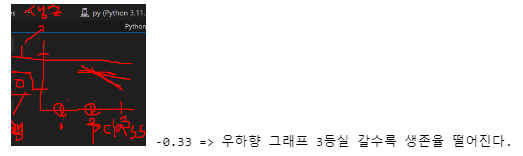
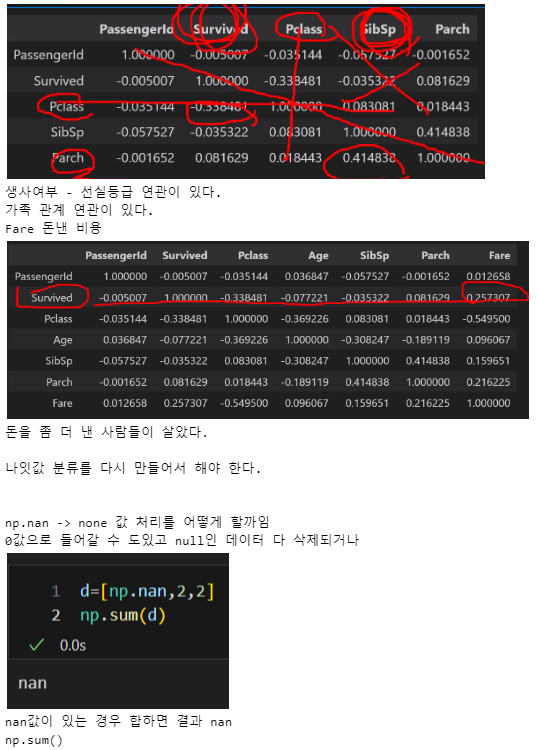

In [22]:
d = [np.nan, 2,2]
np.nansum(d)

4.0

In [24]:
plt.figure(figsize = (15,15))
sns.heatmap(data = data.corr(), annot = True,
fmt = ',2f', linewidths = .5, cmap = 'Blues')

NameError: name 'data' is not defined

<Figure size 1500x1500 with 0 Axes>

In [23]:
d = [np.nan, 2,2]
np.nansum(d), np.mean(d), np.nanmean(d)

a = pd.DataFrame({'name':d})
a['name'].mean()

2.0

In [25]:
titanic_df['Age'][:30]
# nan 처리

0     22.0
1     38.0
2     26.0
3     35.0
4     35.0
5      NaN
6     54.0
7      2.0
8     27.0
9     14.0
10     4.0
11    58.0
12    20.0
13    39.0
14    14.0
15    55.0
16     2.0
17     NaN
18    31.0
19     NaN
20    35.0
21    34.0
22    15.0
23    28.0
24     8.0
25    38.0
26     NaN
27    19.0
28     NaN
29     NaN
Name: Age, dtype: float64

In [26]:
a = titanic_df[['Age', 'Fare']]
a.corr()

,Age,Fare
Age,1.000000,0.096067
Fare,0.096067,1.000000


In [27]:
a[:30]

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
5,NaN,8.4583
6,54.0,51.8625
7,2.0,21.0750
8,27.0,11.1333
9,14.0,30.0708


- nan 없는 것만 골라서 corr() 있ㄴ느거 corr() 비교
    - 경우의 수를 모두 다 확인하는 방법 = 일일히 데이터를 찾아서 보는 수 밖에 없다.

In [28]:
def myRandom(data, Num=5):
    if type(Num) != int:
        return f'type {type(Num)} 이 잘못되었어요. 정수를 넣어주세요'
    import random
    dataLength = len(data)
    if Num>dataLength:
        print('data overflow', 'you Data MaxCount==>', dataLength)
    else:
        numList = [random.randrange(0, dataLength) for x in range(Num)]
        display(data.iloc[numList, :])

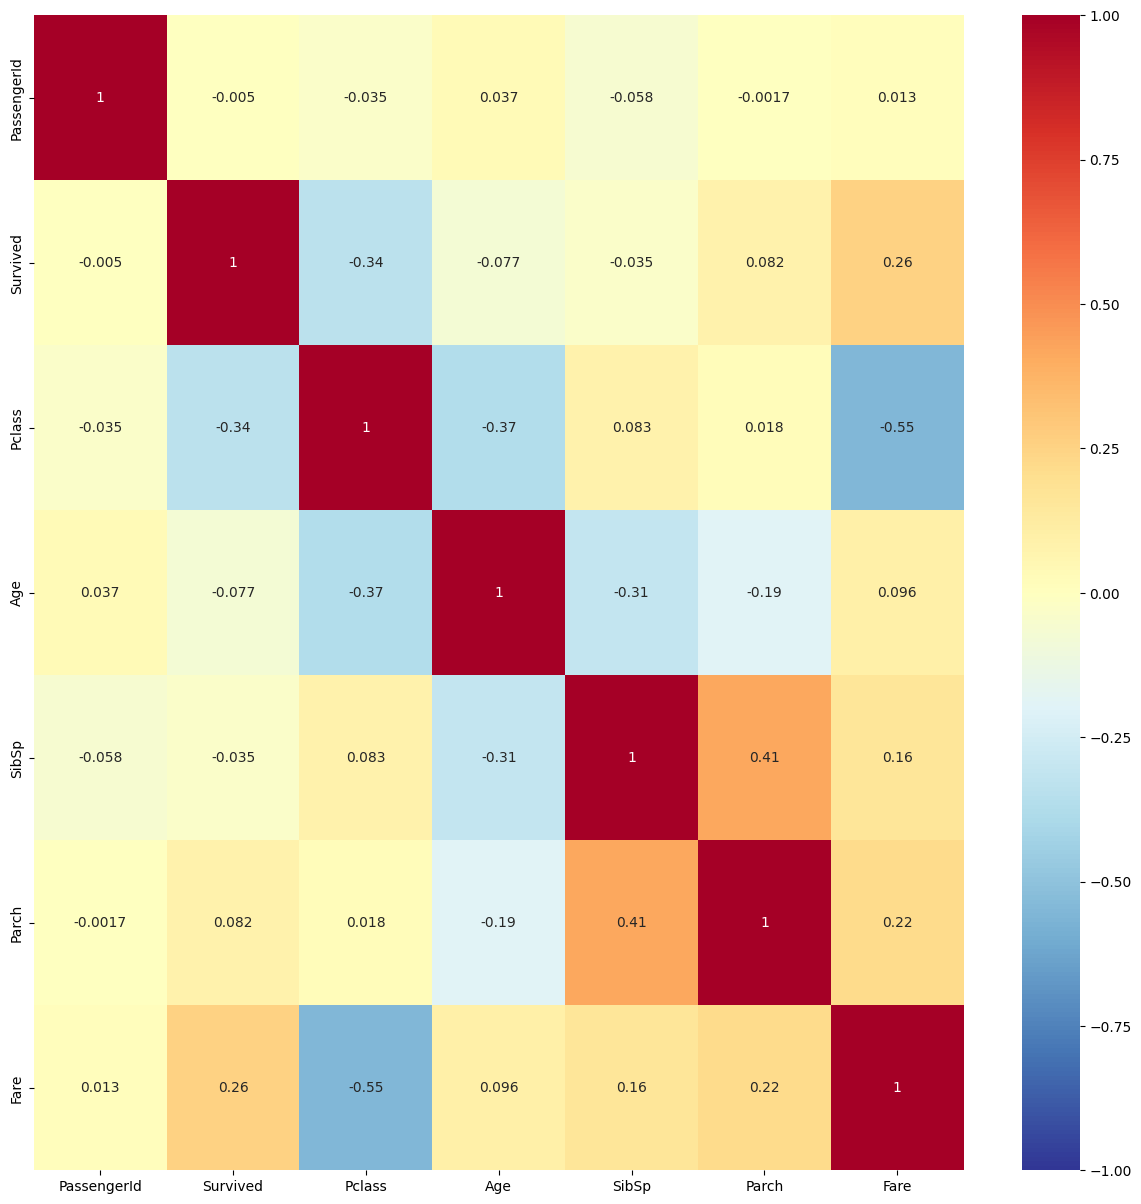

In [33]:
def myCorr(data):
    corrList= []
    tmp = titanic_df.dtypes
    findtype = ['int32', 'int64', 'float32', 'float64']

    for index, val in zip(tmp.index, tmp.values):
        if val in findtype:
            corrList.append(index)
    df = data[corrList].corr()
    df.to_csv('c://data/corr.csv')

    figure = plt.figure(figsize=(15,15))
    sns.heatmap(df, annot = True, cmap='RdYlBu_r', vmin =-1, vmax = 1)

    # 그림 파일 세이브
    figure.savefig('c://data/image00.png')

myCorr(titanic_df)

### [추가]  결측치 데이터처리
- 결측치 데이터는 머신러닝에서 계산이 불가때문에 에러
- 결측치가 있는 행 데이터 제거, 어떤 값으로 대체 (0, 임의값을 지정, 예측값으로 바꾸거나, 평균이나 중앙값으로 채우거나)

In [35]:
### 추가, 결측치 시각화 모듈을 검색해서 작업 꼭 하세요
tmp = titanic_df.isna().sum
plt.baarh(tmp)

NameError: name 'ptl' is not defined

In [37]:
# titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True) # 평균으로 채움
# titanic_df['Age'].fillna(0, inplace=True) # 0으로 채움
titanic_df['Age'].fillna(0, inplace=True)

titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
print('데이터 세트 Null 값 개수 ',titanic_df.isnull().sum().sum())


데이터 세트 Null 값 개수  0


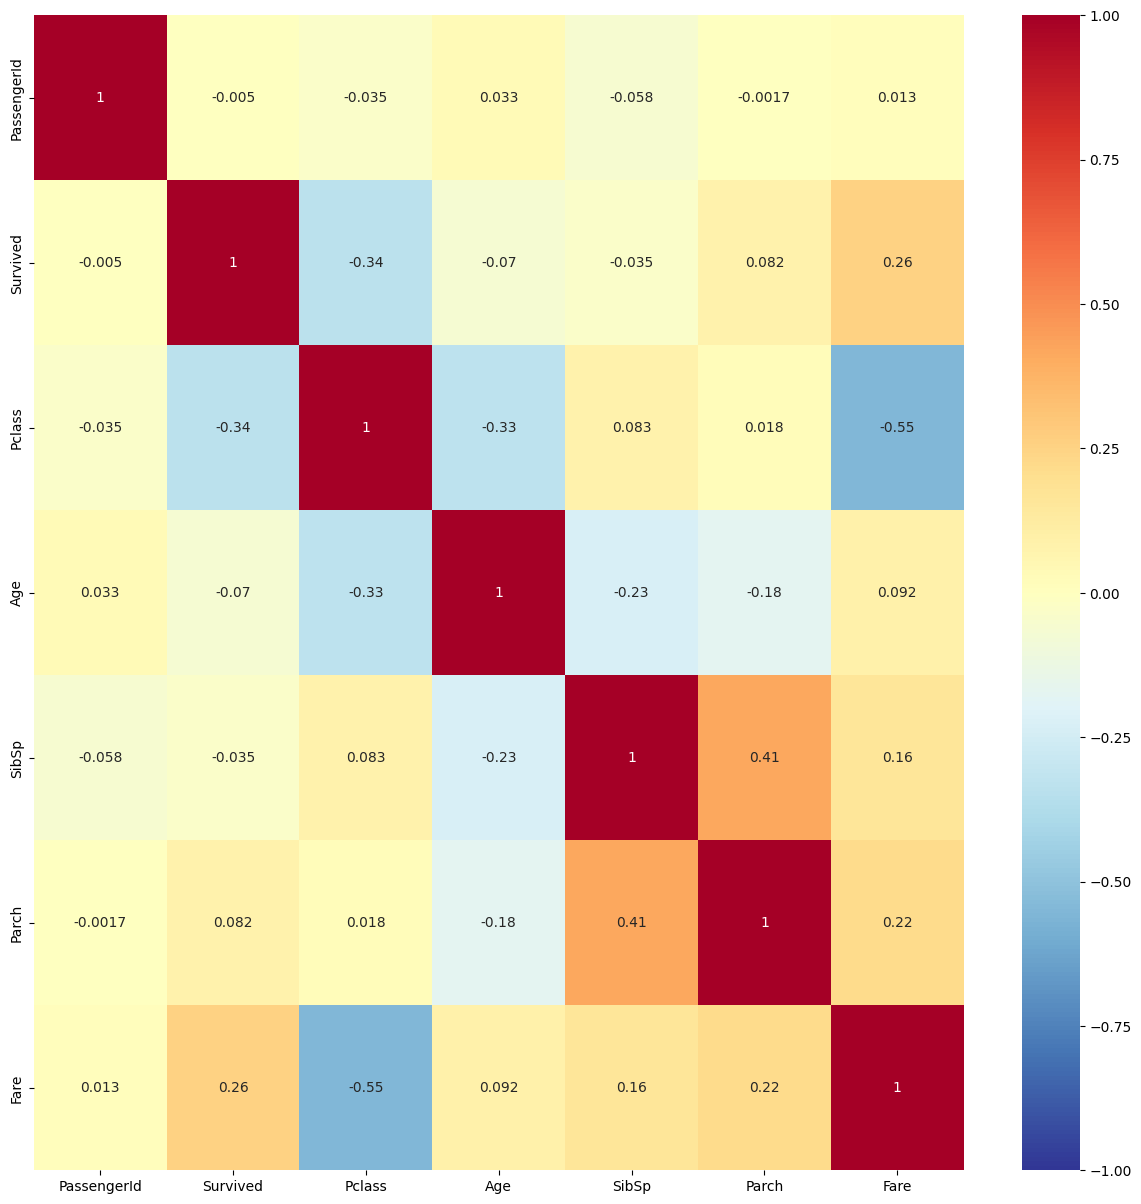

In [38]:
### 추가 
myCorr(titanic_df)

In [39]:
print(' Sex 값 분포 :\n',titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포 :\n',titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포 :\n',titanic_df['Embarked'].value_counts())

 Sex 값 분포 :
 Sex
male      577
female    314
Name: count, dtype: int64

 Cabin 값 분포 :
 Cabin
N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: count, Length: 148, dtype: int64

 Embarked 값 분포 :
 Embarked
S    644
C    168
Q     77
N      2
Name: count, dtype: int64


,name,val,ratio
0,male,577,64.76
1,female,314,35.24


([<matplotlib.patches.Wedge at 0x211ba1e5c10>,
 [Text(-0.4919454136803954, 0.9838646807152012, ''),
  Text(0.4919455057964525, -0.9838646346559433, '')])

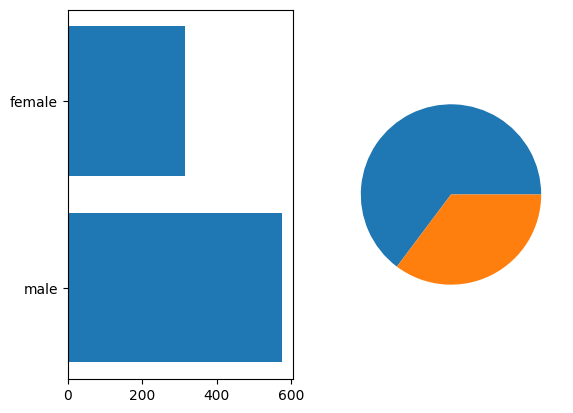

In [45]:
# filed 컬럼의 벨류 카운트 비율 차트화 

filed = 'Sex'
tmp = titanic_df[filed].value_counts()
ratio = [round((x/tmp.sum())*100, 2) for x in tmp]
display(pd.DataFrame({'name':tmp.index, 'val':tmp.values, 'ratio':ratio}))

plt.subplot(1,2,1)  # subplot 1번
plt.barh(tmp.index, tmp.values)

plt.subplot(1,2,2)  # subplot 2번
plt.pie(tmp.values)

## 위에꺼 함수화
- 차트화

,name,val,ratio
0,male,577,64.76
1,female,314,35.24


(<BarContainer object of 2 artists>,
 ([<matplotlib.patches.Wedge at 0x211be113c10>,
  [Text(-0.4919454136803954, 0.9838646807152012, ''),
   Text(0.4919455057964525, -0.9838646346559433, '')]))

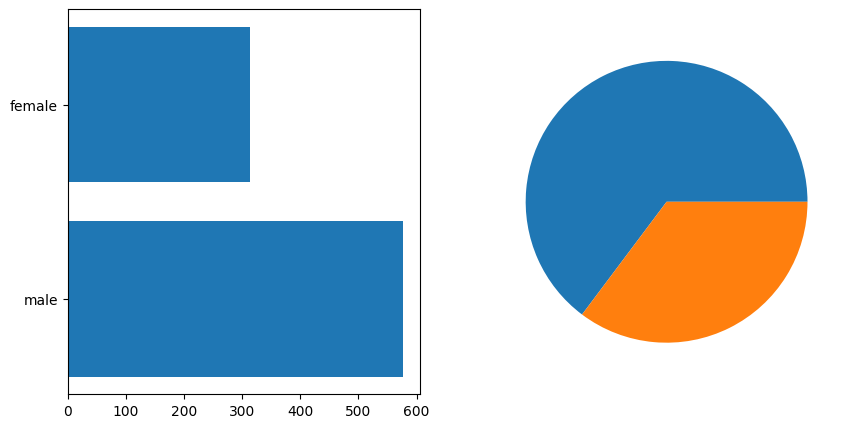

In [55]:
def cht(filed):
    # filed = 'Sex'
    tmp = titanic_df[filed].value_counts()
    ratio = [round((x/tmp.sum())*100, 2) for x in tmp]
    display(pd.DataFrame({'name':tmp.index, 'val':tmp.values, 'ratio':ratio}))

    plt.figure(figsize=(10, 5))

    plt.subplot(1,2,1)  # subplot 1번
    bh = plt.barh(tmp.index, tmp.values)

    plt.subplot(1,2,2)  # subplot 2번
    pi = plt.pie(tmp.values)

    return (bh, pi)

cht('Sex')

In [41]:

titanic_df[filed].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [51]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


In [52]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()


Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<Axes: xlabel='Sex', ylabel='Survived'>

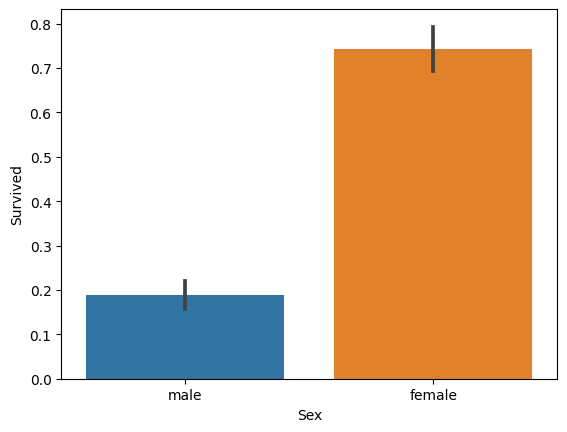

In [53]:
# 생존1, 생존0
sns.barplot(x='Sex', y = 'Survived', data=titanic_df)


<Axes: xlabel='Pclass', ylabel='Survived'>

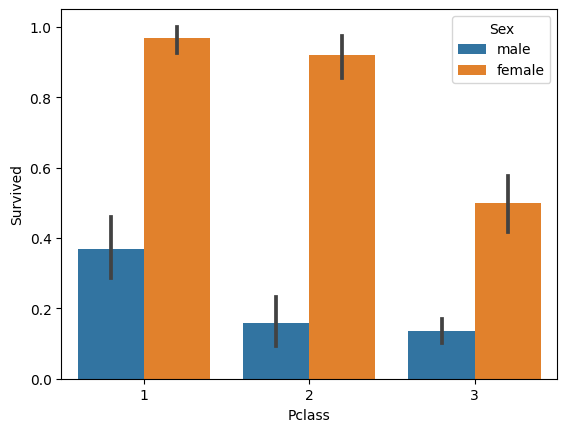

In [56]:
sns.barplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data=titanic_df)

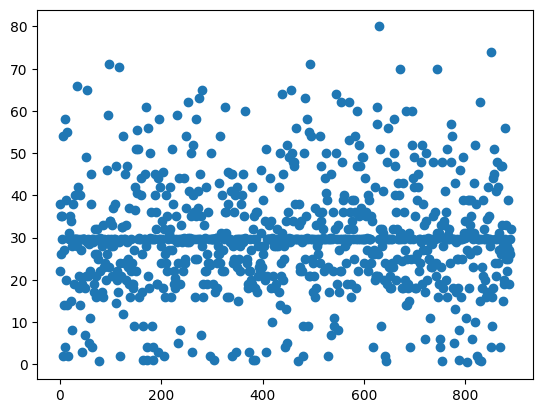

In [63]:
### [추가] 산점도 차트 숫자형은 다 제작해야함.
# plt.plot(titanic_df['Age'])
plt.scatter(titanic_df.index, titanic_df['Age'])

In [57]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,N,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,N,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,N,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,C


In [77]:
### [추가] 선실 등급별 생존률 차트를 그리기 위한 사전 작업
tmp1 = titanic_df[(titanic_df['Pclass'] == 1) & (titanic_df['Sex'] == 'male') & (titanic_df['Age'] >= 15) & (titanic_df['Age'] < 40)]
tmp2 = titanic_df[(titanic_df['Pclass'] == 2) & (titanic_df['Sex'] == 'male') & (titanic_df['Age'] >= 15) & (titanic_df['Age'] < 40)]
tmp3 = titanic_df[(titanic_df['Pclass'] == 3) & (titanic_df['Sex'] == 'male') & (titanic_df['Age'] >= 15) & (titanic_df['Age'] < 40)]

<Axes: xlabel='Sex', ylabel='Survived'>

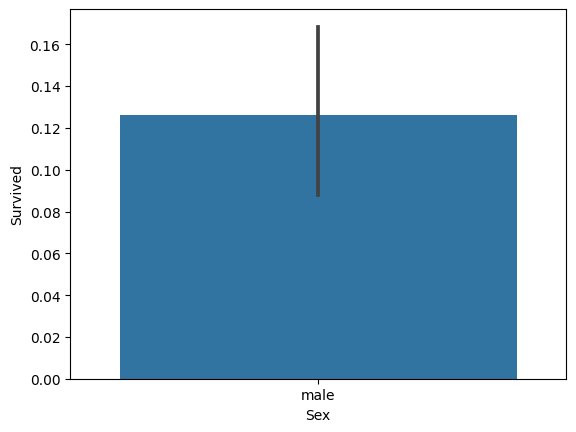

In [79]:
sns.barplot(x='Sex', y = 'Survived', data=tmp3)


In [80]:
titanic_df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [81]:
tmp1['Survived'].value_counts()

Survived
0    39
1    27
Name: count, dtype: int64

In [82]:
tmp2['Survived'].value_counts()

Survived
0    72
1     6
Name: count, dtype: int64

In [83]:
tmp3['Survived'].value_counts()

Survived
0    249
1     36
Name: count, dtype: int64

In [85]:
result = []
result.append(titanic_df['Survived'].value_counts())
result.append(tmp1['Survived'].value_counts())
result.append(tmp2['Survived'].value_counts())
result.append(tmp3['Survived'].value_counts())

result

[Survived
 0    549
 1    342
 Name: count, dtype: int64,
 Survived
 0    39
 1    27
 Name: count, dtype: int64,
 Survived
 0    72
 1     6
 Name: count, dtype: int64,
 Survived
 0    249
 1     36
 Name: count, dtype: int64]

In [86]:
pd.DataFrame(result)

Survived,0,1
count,549,342
count,39,27
count,72,6
count,249,36


In [87]:
pd.DataFrame({'all': titanic_df['Survived'].value_counts(),
'Pclass1':tmp1['Survived'].value_counts(),
'Pclass2':tmp2['Survived'].value_counts(),
'Pclass3':tmp3['Survived'].value_counts()})

,all,Pclass1,Pclass2,Pclass3
Survived,,,,
0,549,39,72,249
1,342,27,6,36


In [88]:
from sklearn import preprocessing
# 레벨 인코더
def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [89]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행.
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

#### 처음부터 다시 시작함.
.필수작업
- 머신러닝에 참여할 문자 데이터를  숫자로 변경하고
- 결측치를 처리하고 

In [91]:
# 원본 데이터를 재로딩 하고, feature데이터 셋과 Label 데이터 셋 추출. 
baseFolder = 'c://data'
titanic_df = pd.read_csv(baseFolder + './titanic/train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived',axis=1)

X_titanic_df = transform_features(X_titanic_df)

In [92]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, \
                                                  test_size=0.2, random_state=11)

In [93]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(solver='liblinear')

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train , y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train , y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train , y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도:0.8547
LogisticRegression 정확도: 0.8659


In [94]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    # 폴드 세트를 5개인 KFold객체를 생성, 폴드 수만큼 예측결과 저장을 위한  리스트 객체 생성.
    kfold = KFold(n_splits=folds)
    scores = []
    
    # KFold 교차 검증 수행. 
    for iter_count , (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
        # Classifier 학습, 예측, 정확도 계산 
        clf.fit(X_train, y_train) 
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))     
    
    # 5개 fold에서의 평균 정확도 계산. 
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score)) 
# exec_kfold 호출
exec_kfold(dt_clf , folds=5) 

교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


In [95]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10],
             'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf , param_grid=parameters , scoring='accuracy' , cv=5)
grid_dclf.fit(X_train , y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :',grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행. 
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test , dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715
